# data aggregation using builtin funs and user-defined functions

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [3]:
import os
os.getcwd()


'd:\\cs(h)Vsem Data analysis and visulaization 2021\\programs\\pandas'

# reading titanictrain data for summarizing

In [3]:
titanicdf1 = pd.read_csv('titanictrain.csv')
titanicdf1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
len(titanicdf1)

891

# Preprocessing

## replacing Nan values with mode in both types of features numeric and non-numeric

In [5]:
for col in titanicdf1:
    if titanicdf1[col].values.dtype  in [np.int64,np.float64]:
        print(col, titanicdf1[col].values.dtype,"Numeric")
        if titanicdf1[col].isnull().sum()>0:
            print("replacing by mode values")
            x=titanicdf1[col].mode().values
            titanicdf1[col].replace(np.NaN,x[0],inplace=True)
    else:
       
        print(col, titanicdf1[col].values.dtype,"Categorical")
        if titanicdf1[col].isnull().sum()>0:
            print("Null values to be replaced by modal value")
            m=titanicdf1[col].describe()[2]
            titanicdf1[col].replace(np.NaN,m,inplace=True)

PassengerId int64 Numeric
Survived int64 Numeric
Pclass int64 Numeric
Name object Categorical
Sex object Categorical
Age float64 Numeric
SibSp int64 Numeric
Parch int64 Numeric
Ticket object Categorical
Fare float64 Numeric
Cabin object Categorical
Embarked object Categorical


# Group by clause

## Find groups in the data on the basis of unique values in a column

In [6]:
titanicdf1.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,314,314,314,314,314,314,314
male,577,577,577,577,577,577,577,577,577,577,577


## grouping over two attributes

In [8]:
gp1=titanicdf1.groupby(['Cabin','Sex'])

In [9]:
type(gp1)

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
gp1.mean()

PassengerId  Survived  Pclass    Age  SibSp  Parch      Fare
Cabin Sex                                                                 
A10   male          584.0       0.0     1.0  36.00    0.0   0.00  40.12500
A14   male          476.0       0.0     1.0  24.00    0.0   0.00  52.00000
A16   female        557.0       1.0     1.0  48.00    1.0   0.00  39.60000
A19   male          285.0       0.0     1.0  24.00    0.0   0.00  26.00000
A20   male          600.0       1.0     1.0  49.00    1.0   0.00  56.92920
...                   ...       ...     ...    ...    ...    ...       ...
F38   male          777.0       0.0     3.0  24.00    0.0   0.00   7.75000
F4    female        619.0       1.0     2.0   4.00    2.0   1.00  39.00000
      male          184.0       1.0     2.0   1.00    2.0   1.00  39.00000
G6    female        216.0       0.5     3.0  14.75    0.5   1.25  13.58125
T     male          340.0       0.0     1.0  45.00    0.0   0.00  35.50000

[171 rows x 7 columns]

# Use of keys and group contents

In [11]:
gp1.keys

['Cabin', 'Sex']

## number of elements in the gp1 object (rowsxcolumn)

In [12]:
gp1.size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000023BAAB29790>>

## number of rows in gp1

In [13]:
len(gp1)

171

# iterating over groups

In [14]:
gp1.indices

{('A10', 'male'): array([583], dtype=int64),
 ('A14', 'male'): array([475], dtype=int64),
 ('A16', 'female'): array([556], dtype=int64),
 ('A19', 'male'): array([284], dtype=int64),
 ('A20', 'male'): array([599], dtype=int64),
 ('A23', 'male'): array([630], dtype=int64),
 ('A24', 'male'): array([867], dtype=int64),
 ('A26', 'male'): array([647], dtype=int64),
 ('A31', 'male'): array([209], dtype=int64),
 ('A32', 'male'): array([185], dtype=int64),
 ('A34', 'male'): array([445], dtype=int64),
 ('A36', 'male'): array([806], dtype=int64),
 ('A5', 'male'): array([96], dtype=int64),
 ('A6', 'male'): array([23], dtype=int64),
 ('A7', 'male'): array([174], dtype=int64),
 ('B101', 'male'): array([737], dtype=int64),
 ('B102', 'male'): array([815], dtype=int64),
 ('B18', 'female'): array([329, 523], dtype=int64),
 ('B19', 'male'): array([170], dtype=int64),
 ('B20', 'female'): array([781], dtype=int64),
 ('B20', 'male'): array([690], dtype=int64),
 ('B22', 'female'): array([540], dtype=int64),


In [16]:
for (k1, k2), group in gp1:
    print((k1, k2))#,group.columns)
    print(len(group[['Fare','Parch']]))

('A10', 'male')
1
('A14', 'male')
1
('A16', 'female')
1
('A19', 'male')
1
('A20', 'male')
1
('A23', 'male')
1
('A24', 'male')
1
('A26', 'male')
1
('A31', 'male')
1
('A32', 'male')
1
('A34', 'male')
1
('A36', 'male')
1
('A5', 'male')
1
('A6', 'male')
1
('A7', 'male')
1
('B101', 'male')
1
('B102', 'male')
1
('B18', 'female')
2
('B19', 'male')
1
('B20', 'female')
1
('B20', 'male')
1
('B22', 'female')
1
('B22', 'male')
1
('B28', 'female')
2
('B3', 'female')
1
('B30', 'male')
1
('B35', 'female')
2
('B37', 'male')
1
('B38', 'male')
1
('B39', 'female')
1
('B4', 'female')
1
('B41', 'male')
1
('B42', 'female')
1
('B49', 'female')
1
('B49', 'male')
1
('B5', 'female')
2
('B50', 'male')
1
('B51 B53 B55', 'male')
2
('B57 B59 B63 B66', 'female')
2
('B58 B60', 'female')
1
('B58 B60', 'male')
1
('B69', 'female')
1
('B71', 'male')
1
('B73', 'female')
1
('B77', 'female')
2
('B78', 'female')
1
('B79', 'female')
1
('B80', 'female')
1
('B82 B84', 'male')
1
('B86', 'male')
1
('B94', 'male')
1
('B96 B98', 'f

## Find total fare paid by male and female passengers individually

In [24]:
titanicdf1.groupby(['Sex'])['Fare'].sum()

Sex
female    13966.6628
male      14727.2865
Name: Fare, dtype: float64

## Find average fare paid by male/female for each embarked station C:Cherborug Q: queenstown  H: Hampston

In [17]:
G1=titanicdf1['Fare'].groupby([titanicdf1['Sex'],titanicdf1['Embarked']])

In [18]:
G1.sum()

Sex     Embarked
female  C           5487.3958
        Q            454.8585
        S           8024.4085
male    C           4584.9004
        Q            567.3958
        S           9574.9903
Name: Fare, dtype: float64

## Compute family size as sum of Parch and sibsp, then find number of passengers with same family size and plot using bar chart

In [19]:
titanicdf1['Familysize']=titanicdf1['Parch']+titanicdf1['SibSp']

In [20]:
G3=titanicdf1.groupby('Familysize')

# plots of all coulmns of G3

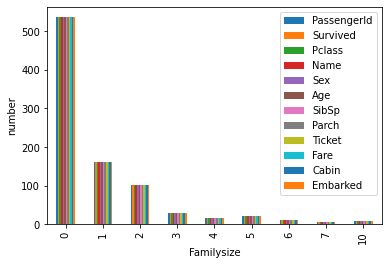

In [21]:
plt1=G3.count().plot.bar(label='count')
plt1.set_ylabel('number')
plt1.legend()

## Need is the count of passengers only for each family size

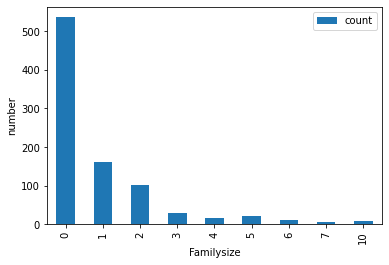

In [22]:
plt1=G3['PassengerId'].count().plot.bar(label='count')
plt1.set_ylabel('number')
plt1.legend()

In [23]:
G3.sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Familysize,,,,,,,
0,245946,163,1289,16209.00,0,0,11407.3238
1,66467,89,309,4891.42,123,38,8032.9547
2,45732,59,227,2637.33,89,115,4048.6332
3,14916,21,60,541.42,39,48,1591.0708
4,5518,3,40,325.00,32,28,871.4168
5,8803,3,57,405.00,62,48,1621.9000
6,4269,4,36,182.00,39,33,352.4000
7,2363,0,18,94.00,26,16,281.4000
10,3372,0,21,168.00,56,14,486.8500


## plot total fare and number of survived by familysize

In [24]:

totalfare=G3['Fare'].sum()
totalsurvived=G3['Survived'].sum()
df1=pd.DataFrame([totalfare,totalsurvived])
df1


Familysize,0,1,2,3,4,5,6,7,10
Fare,11407.3238,8032.9547,4048.6332,1591.0708,871.4168,1621.9,352.4,281.4,486.85
Survived,163.0000,89.0000,59.0000,21.0000,3.0000,3.0,4.0,0.0,0.00


<AxesSubplot:ylabel='total'>

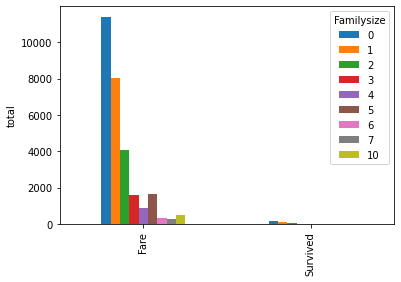

In [25]:
df1.plot.bar(ylabel='total')

## Get totalsurvive vs total fare side by side needs to unstack the columns of df1

In [26]:
df2=df1.unstack(level=0)
df2
df2=df2.unstack()
df2

,Fare,Survived
Familysize,,
0,11407.3238,163.0
1,8032.9547,89.0
2,4048.6332,59.0
3,1591.0708,21.0
4,871.4168,3.0
5,1621.9000,3.0
6,352.4000,4.0
7,281.4000,0.0
10,486.8500,0.0


<AxesSubplot:xlabel='Familysize', ylabel='total'>

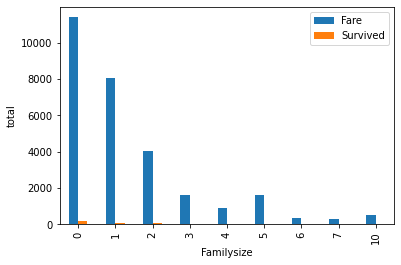

In [27]:
df2.plot.bar(ylabel='total')

## Find maximum family size of male/female

In [28]:
GF=titanicdf1.groupby('Sex')
GF['Familysize'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,1.343949,1.755733,0.0,0.0,1.0,2.0,10.0
male,577.0,0.665511,1.478106,0.0,0.0,0.0,1.0,10.0


In [29]:
GF['Familysize'].describe()['max']

Sex
female    10.0
male      10.0
Name: max, dtype: float64

## find meanage genderwise

In [30]:
GF['Age'].mean()

Sex
female    27.254777
male      29.281057
Name: Age, dtype: float64

# grouping by mapping

In [31]:
dfnew = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
dfnew.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
dfnew

,a,b,c,d,e
Joe,0.005257,0.372053,3.782610,-1.531540,-1.141374
Steve,-0.377285,-0.553785,1.660482,-1.092785,0.625017
Wes,1.462555,NaN,NaN,-0.362089,0.866551
Jim,-0.667440,-2.892687,-0.454222,-0.826719,0.539918
Travis,-0.592500,1.424927,0.329145,-1.026139,-2.142034


In [33]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [34]:
by_column = dfnew.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,2.251070,-0.764064
Steve,0.567698,-0.306053
Wes,-0.362089,2.329106
Jim,-1.280940,-3.020210
Travis,-0.696995,-1.309607


## grouping with functions: make groups using length of index labels

In [35]:
dfnew.groupby(len).sum()

,a,b,c,d,e
3,0.800371,-2.520635,3.328388,-2.720348,0.265095
5,-0.377285,-0.553785,1.660482,-1.092785,0.625017
6,-0.592500,1.424927,0.329145,-1.026139,-2.142034


In [36]:
dfnew.groupby(len).count()

,a,b,c,d,e
3,3,2,2,3,3
5,1,1,1,1,1
6,1,1,1,1,1


In [37]:
titanicdf1.set_index(['Ticket','Embarked'])

,,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Familysize
Ticket,Embarked,,,,,,,,,,,
A/5 21171,S,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,B96 B98,1
PC 17599,C,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1
STON/O2. 3101282,S,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,B96 B98,0
113803,S,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,1
373450,S,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,B96 B98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
211536,S,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,B96 B98,0
112053,S,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,0
W./C. 6607,S,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,23.4500,B96 B98,3


In [38]:
titanicdf1.sort_index()
titanicdf1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


# Revision: read the Titanic dataset and replacing null values with mode for both categorical and numeric data column

In [51]:
titanicdf1 = pd.read_csv('titanictrain.csv')
titanicdf1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
for col in titanicdf1:
    if titanicdf1[col].values.dtype  in [np.int64,np.float64]:
        print(col, titanicdf1[col].values.dtype,"Numeric")
        if titanicdf1[col].isnull().sum()>0:
            print("replacing by mode values")
            x=titanicdf1[col].mode().values
            titanicdf1[col].replace(np.NaN,x[0],inplace=True)
    else:
       
        print(col, titanicdf1[col].values.dtype,"Categorical")
        if titanicdf1[col].isnull().sum()>0:
            print("Null values to be replaced by modal value")
            m=titanicdf1[col].describe()[2]
            titanicdf1[col].replace(np.NaN,m,inplace=True)

PassengerId int64 Numeric
Survived int64 Numeric
Pclass int64 Numeric
Name object Categorical
Sex object Categorical
Age float64 Numeric
replacing by mode values
SibSp int64 Numeric
Parch int64 Numeric
Ticket object Categorical
Fare float64 Numeric
Cabin object Categorical
Null values to be replaced by modal value
Embarked object Categorical
Null values to be replaced by modal value


## Problem1: Find description of Values in Fare column for each cabin type

In [53]:
titanicdf1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## find total fare for each cabin type

In [40]:

grouped = titanicdf1.groupby('Cabin')
grouped['Fare'].sum()

Cabin
A10    40.1250
A14    52.0000
A16    39.6000
A19    26.0000
A20    56.9292
        ...   
F33    34.0000
F38     7.7500
F4     78.0000
G6     54.3250
T      35.5000
Name: Fare, Length: 147, dtype: float64

In [56]:
grouped['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Cabin,,,,,,,,
A10,1.0,40.125000,NaN,40.1250,40.1250,40.12500,40.1250,40.1250
A14,1.0,52.000000,NaN,52.0000,52.0000,52.00000,52.0000,52.0000
A16,1.0,39.600000,NaN,39.6000,39.6000,39.60000,39.6000,39.6000
A19,1.0,26.000000,NaN,26.0000,26.0000,26.00000,26.0000,26.0000
A20,1.0,56.929200,NaN,56.9292,56.9292,56.92920,56.9292,56.9292
...,...,...,...,...,...,...,...,...
F33,3.0,11.333333,1.443376,10.5000,10.5000,10.50000,11.7500,13.0000
F38,1.0,7.750000,NaN,7.7500,7.7500,7.75000,7.7500,7.7500
F4,2.0,39.000000,0.000000,39.0000,39.0000,39.00000,39.0000,39.0000


In [41]:
grouped['Fare'].describe().sort_values('count')

,count,mean,std,min,25%,50%,75%,max
Cabin,,,,,,,,
A10,1.0,40.125000,NaN,40.1250,40.1250,40.12500,40.1250,40.1250
D30,1.0,53.100000,NaN,53.1000,53.1000,53.10000,53.1000,53.1000
D28,1.0,39.400000,NaN,39.4000,39.4000,39.40000,39.4000,39.4000
D21,1.0,51.862500,NaN,51.8625,51.8625,51.86250,51.8625,51.8625
D19,1.0,52.554200,NaN,52.5542,52.5542,52.55420,52.5542,52.5542
...,...,...,...,...,...,...,...,...
C22 C26,3.0,151.550000,0.000000,151.5500,151.5500,151.55000,151.5500,151.5500
F2,3.0,26.000000,0.000000,26.0000,26.0000,26.00000,26.0000,26.0000
C23 C25 C27,4.0,263.000000,0.000000,263.0000,263.0000,263.00000,263.0000,263.0000


# Find that index value of rows where cabin value == 'C23 C25 C27' 

In [103]:
titanicdf1.loc[(titanicdf1['Cabin'] == 'C23 C25 C27')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,C23 C25 C27,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,C23 C25 C27,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,C23 C25 C27,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C23 C25 C27,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,C23 C25 C27,S


In [42]:
titanicdf1[(titanicdf1['Cabin'] == 'C23 C25 C27')].index.tolist()

[27, 88, 341, 438]

## Find cabin with maximum fare

In [81]:
total=grouped['Fare'].sum()
total[total==total.max()]

Cabin
B96 B98    13641.0825
Name: Fare, dtype: float64

# Data aggregation:  Optimzed groupby methods:
* count: Number of non-NA values in the group
* sum: Sum of non-NA values
* mean: Mean of non-NA values
* median: Arithmetic median of non-NA values
* std, var: Unbiased (n – 1 denominator) standard deviation and variance
* min, max: Minimum and maximum of non-NA values
* prod: Product of non-NA values
* first, last: First and last non-NA values

## problem 1: Find standard deviation,mean and count of  Values in Fare column for each cabin type and replace Nan with 0

In [43]:
grouped['Fare'].agg(['mean','count','std'])

,mean,count,std
Cabin,,,
A10,40.125000,1,NaN
A14,52.000000,1,NaN
A16,39.600000,1,NaN
A19,26.000000,1,NaN
A20,56.929200,1,NaN
...,...,...,...
F33,11.333333,3,1.443376
F38,7.750000,1,NaN
F4,39.000000,2,0.000000


In [63]:
(grouped['Fare'].agg(['mean','count','std'])).replace(np.NaN,0)

,mean,count,std
Cabin,,,
A10,40.125000,1,0.000000
A14,52.000000,1,0.000000
A16,39.600000,1,0.000000
A19,26.000000,1,0.000000
A20,56.929200,1,0.000000
...,...,...,...
F33,11.333333,3,1.443376
F38,7.750000,1,0.000000
F4,39.000000,2,0.000000


## Problem 2: Find cabin with maximum number of passengers and minimum number of passengers travelling 

In [88]:
m=grouped['Fare'].count()
m[m==m.max()]

Cabin
B96 B98    691
Name: Fare, dtype: int64

## problem 3: Find the average and std of  fare values of the cabin type with maximum records i.e. different Fare values

In [74]:
len(titanicdf1)

891

In [89]:
G=grouped['Fare'].agg(['count','mean','std','min','max'])

In [90]:
G

,count,mean,std,min,max
Cabin,,,,,
A10,1,40.125000,NaN,40.1250,40.1250
A14,1,52.000000,NaN,52.0000,52.0000
A16,1,39.600000,NaN,39.6000,39.6000
A19,1,26.000000,NaN,26.0000,26.0000
A20,1,56.929200,NaN,56.9292,56.9292
...,...,...,...,...,...
F33,3,11.333333,1.443376,10.5000,13.0000
F38,1,7.750000,NaN,7.7500,7.7500
F4,2,39.000000,0.000000,39.0000,39.0000


In [93]:
m=G['count'].max()

In [94]:
m

691

In [100]:
G[G['count']==m][['mean','std','min','max','count']]

,mean,std,min,max,count
Cabin,,,,,
B96 B98,19.741075,29.587756,0.0,512.3292,691


In [101]:
indx=G[G['count']==m][['mean','std','min','max','count']].index

In [102]:
v=indx.values

In [98]:
v

array(['B96 B98'], dtype=object)

In [97]:
v[0]

'B96 B98'

## Problem4: As std is high let us plot distribution of this cabin (with maximum passengers)

In [20]:
import matplotlib.pyplot as plt
import matplotlib

In [105]:
for key,group in grouped:
    if key in v:
        GF=group['Fare']

In [106]:
GF

0       7.2500
2       7.9250
4       8.0500
5       8.4583
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 691, dtype: float64

<AxesSubplot:ylabel='Density'>

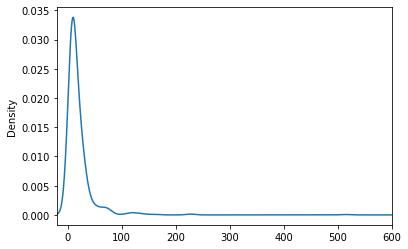

In [108]:
GF.plot.density(xlim=[-20,600])

<AxesSubplot:ylabel='Frequency'>

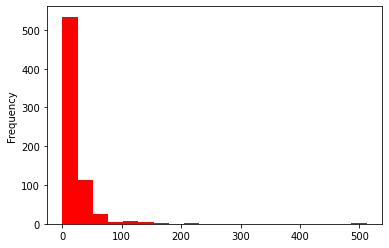

In [109]:
GF.plot(kind='hist',bins=20,color='red')

<AxesSubplot:>

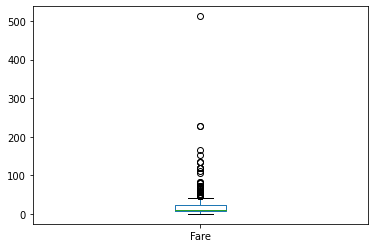

In [110]:
GF.plot.box()

# above boxplot indicates a large number of outliers in fare column

outlier<(Q1-1.5(q3-q1)) out>Q3 + 1.5 * IQR # in general
Lower Quartile (Q1) = (N+1) * 1 / 4.
Middle Quartile (Q2) = (N+1) * 2 / 4.
Upper Quartile (Q3 )= (N+1) * 3 / 4.
Interquartile Range = Q3 – Q1

## Compute outliers in Fare column  of the group cabin value 'G6' on the basis of  user-computed lowval and maxval

In [111]:
GF.count()

691

In [112]:
GF

0       7.2500
2       7.9250
4       8.0500
5       8.4583
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 691, dtype: float64

In [394]:
Q1=GF.quantile(0.25)

In [395]:
Q1

7.8792

In [396]:
Q3=GF.quantile(0.75)

In [397]:
GF.quantile(0.5)==GF.median()


True

In [400]:
Q2=GF.quantile(0.5)

In [401]:
print(Q1,Q2,Q3)

7.8792 10.5 23.0


In [403]:
GF.min()

0.0

In [404]:
GF.max()

512.3292

In [405]:
IQR= Q3-Q1
lowval=Q1- 1.5*IQR
maxval=Q3+10*IQR
print(Q1,Q3,lowval,maxval)

7.8792 23.0 -14.801999999999996 174.208


In [408]:
GF[(GF>maxval)|(GF<lowval)].count()

3

In [409]:
GF[(GF>maxval)|(GF<lowval)].index

Int64Index([258, 380, 557], dtype='int64')

# Problem: Use titanic datasets to answer the following query:
* Find total fare paid by the passengers of family-size 6 who have embarked from station S: 'South Hampton'
 

In [415]:
titanicdf1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

# define a user-define function to get number of outliers in a series/list alongwith outliers index. in case no outliers retuen Nan

In [114]:
def user_outliers(S):
    #print(S.count())
    Q1=S.quantile(0.25)
    Q3=S.quantile(0.75)
    IQR= Q3-Q1
    lowval=Q1- 1.5*IQR
    maxval=Q3+2*IQR
    LI=S[(S>maxval)|(S<lowval)].index
    #print(Q1,Q3,IQR,lowval,maxval)
    #print(S[(S>maxval)|(S<lowval)].count())
    if len(LI)==0:
        return np.NaN
    else:
        return (len(LI),LI)


In [115]:
G2=grouped['Fare'].agg(user_outliers)
type(G2)

pandas.core.series.Series

In [116]:
G2[G2.notna()]

Cabin
C23 C25 C27    (41, [27, 34, 72, 74, 88, 120, 155, 159, 169, ...
Name: Fare, dtype: object

In [48]:
frame.isna().sum().sum()

4